# Recent supernova

**WARNING**: This notebook needs to be updated. Under construction now...

Select only fast rising recent supernova, discard candidates too close to the ecliptic or the MW plane, or which have a very large galactic extinction. Also discard candidates which have a high bogus probability (own, or rb or drb)

### Load libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import astropy.units as u
from astropy import coordinates
from astropy.time import Time
from datetime import datetime
from IPython.display import HTML
from ipywidgets import Layout, Box, widgets
from IPython.core.display import display, HTML

In [19]:
from matplotlib.cm import viridis

ALeRCE client

In [20]:
#!pip install alerce
from alerce.core import Alerce
client = Alerce()

Use pyephem https://pypi.org/project/pyephem/

In [21]:
#!pip install pyephem
import ephem

Install psycopg2 https://github.com/psycopg/psycopg2

In [22]:
#!pip install psycopg2-binary
import psycopg2

In [23]:
import requests

### Get credentials (in github repository)

In [24]:
import json
credentials_file = "../alercereaduser_v4.json"
with open(credentials_file) as jsonfile:
    params = json.load(jsonfile)["params"]

### Connect to DB

In [25]:
conn = psycopg2.connect(dbname=params['dbname'], user=params['user'], host=params['host'], password=params['password'])

In [29]:
query = """
SELECT table_name  FROM information_schema.tables
WHERE table_schema='alerce'
ORDER BY table_name;
"""
tables = pd.read_sql_query(query, conn)
tables.sort_values(by="table_name")

/home/fforster/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,table_name
0,allwise
1,dataquality
2,detection
3,feature
4,feature_version
5,gaia_ztf
6,lc_classifier
7,lc_classifier_periodic
8,lc_classifier_stochastic
9,lc_classifier_top


In [30]:
alltabs = []
for tab in sorted(tables.table_name):
    cols = pd.DataFrame()
    query = "select column_name, data_type from information_schema.columns where table_name = '%s';" % tab
    results = pd.read_sql_query(query, conn)
    results["table"] = tab
    alltabs.append(results)
dftab = pd.concat(alltabs)
pd.options.display.max_rows = 999
display(dftab[["table", "column_name", "data_type"]])
pd.options.display.max_rows = 101

/home/fforster/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/fforster/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/fforster/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(
/home/fforster/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/c

,table,column_name,data_type
0,allwise,k_msig_2mass,double precision
1,allwise,ra,double precision
2,allwise,dec,double precision
3,allwise,w1mpro,double precision
4,allwise,w2mpro,double precision
5,allwise,w3mpro,double precision
6,allwise,w4mpro,double precision
7,allwise,w1sigmpro,double precision
8,allwise,w2sigmpro,double precision
9,allwise,w3sigmpro,double precision


In [31]:
query = "select * from taxonomy"
classes = pd.read_sql_query(query, conn)
classes

/home/fforster/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,classifier_name,classifier_version,classes
0,lc_classifier,hierarchical_random_forest_1.0.0,"[SNIa, SNIbc, SNII, SLSN, QSO, AGN, Blazar, CV..."
1,lc_classifier_top,hierarchical_random_forest_1.0.0,"[Transient, Stochastic, Periodic]"
2,lc_classifier_transient,hierarchical_random_forest_1.0.0,"[SNIa, SNIbc, SNII, SLSN]"
3,lc_classifier_stochastic,hierarchical_random_forest_1.0.0,"[QSO, AGN, Blazar, CV/Nova, YSO]"
4,lc_classifier_periodic,hierarchical_random_forest_1.0.0,"[LPV, E, DSCT, RRL, CEP, Periodic-Other]"
5,stamp_classifier,stamp_classifier_1.0.0,"[SN, AGN, VS, asteroid, bogus]"
6,stamp_classifier,stamp_classifier_1.0.4,"[SN, AGN, VS, asteroid, bogus]"


### Query objects which appeared during the last xx days, which are classified as supernova by the early classifier with a probability greater than 0.5 or which have more than one detection

In [71]:
ndays = 4
mjd_last = Time(datetime.utcnow(), scale='utc').mjd - ndays

query='''
SELECT
    object.oid, object.meanra, object.meandec, object.firstmjd,
    object.ndet, probability.probability
FROM 
    object 
INNER JOIN
    probability
ON 
    object.oid = probability.oid
WHERE
    object.firstMJD > %s
    AND probability.class_name='SN'
    AND probability.ranking=1
    AND (probability.probability>0.5
        OR object.ndet>1)
''' % (mjd_last)

sn = pd.read_sql_query(query, conn)
sn.set_index('oid', inplace=True)
print(sn.shape)
sn.head()

/home/fforster/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


(226, 5)


,meanra,meandec,firstmjd,ndet,probability
oid,,,,,
ZTF23aasnmgl,236.946577,-2.936317,60141.213924,3,0.703596
ZTF23aasejox,281.327658,9.557160,60141.253646,1,0.517499
ZTF23aaseoqq,285.710186,44.938830,60141.280949,1,0.598561
ZTF23aasedol,249.542595,29.922478,60141.258889,1,0.582950
ZTF23aasesan,287.427883,65.207873,60141.281887,1,0.546147


Text(0.5, 0, 'firstmjd')

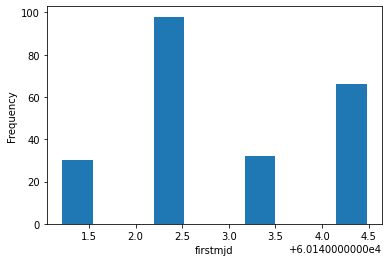

In [72]:
fig, ax = plt.subplots()
sn.firstmjd.plot.hist(ax=ax)
ax.set_xlabel("firstmjd")

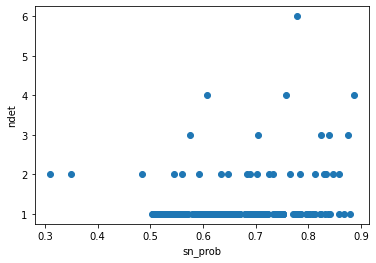

In [73]:
fig, ax = plt.subplots()
ax.set_xlabel("sn_prob")
ax.set_ylabel("ndet")
ax.scatter(sn.probability, sn.ndet)

### Refine search, get first detections if not close to a star and not a bogus according to rb

In [74]:
query='''
SELECT
    det.oid, det.candid,
    det.drb, det.fid, 
    det.mjd, det.magpsf, det.sigmapsf,
    det.has_stamp,
    ps1.sgscore1, ps1.distpsnr1
FROM
    (SELECT *
    FROM detection
    WHERE oid in (%s)
    ) as det
    INNER JOIN
    (SELECT *
    FROM ps1_ztf
    WHERE oid in (%s)
    ) as ps1
    ON det.oid=ps1.oid
WHERE
     (ps1.sgscore1 < 0.5 OR ps1.distpsnr1 > 1)
    AND det.drb > 0.5
''' % (",".join(["'%s'" % oid for oid in sn.index]), ",".join(["'%s'" % oid for oid in sn.index]))

detections = pd.read_sql_query(query, conn)
detections.set_index('oid', inplace=True)
detections.head()

/home/fforster/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,candid,drb,fid,mjd,magpsf,sigmapsf,has_stamp,sgscore1,distpsnr1
oid,,,,,,,,,
ZTF18abntxvz,2389360620215015010,0.999973,2,60143.360625,20.143150,0.171487,True,0.032375,0.182637
ZTF18abqbxle,2388459105715015084,0.997532,2,60142.459109,19.464703,0.211989,True,0.000000,0.339623
ZTF18abqqcwb,2390391271915015009,0.974271,2,60144.391273,19.707148,0.182753,True,0.031875,1.215990
ZTF18abratmn,2387427600215015000,0.999815,2,60141.427604,20.170948,0.194752,True,0.002500,0.524479
ZTF18abratmn,2390388920215015000,0.999988,2,60144.388924,20.185648,0.171952,True,0.002500,0.524479


<AxesSubplot:ylabel='Frequency'>

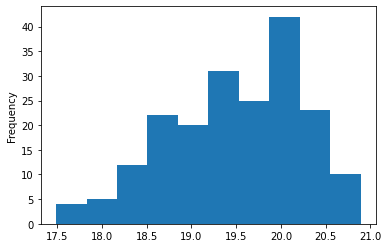

In [75]:
detections.magpsf.plot.hist()

### Get non detections after previous filtering

In [76]:
query='''
SELECT
    oid, mjd, diffmaglim, fid
FROM
    non_detection
WHERE
    oid in (%s)
''' % (",".join(["'%s'" % oid for oid in detections.index.unique()]))

non_detections = pd.read_sql_query(query, conn)
non_detections.set_index('oid', inplace=True)
non_detections.head()

/home/fforster/anaconda3/lib/python3.8/site-packages/pandas/io/sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,mjd,diffmaglim,fid
oid,,,
ZTF18abntxvz,60114.412708,20.7476,1
ZTF18abntxvz,60117.330694,20.4540,1
ZTF18abntxvz,60119.411250,20.4090,1
ZTF18abntxvz,60121.407512,20.3234,1
ZTF18abntxvz,60123.358160,20.6881,1


<AxesSubplot:ylabel='Frequency'>

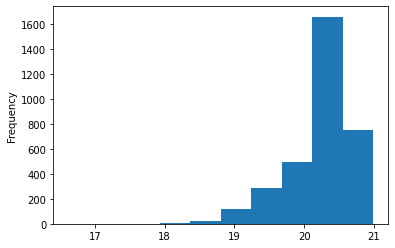

In [77]:
non_detections.diffmaglim.plot.hist()

### Compute dm/dt

In [78]:
def do_dmdt(oid):
    dmdts = []
    dets = detections.loc[oid]
    try: # make sure this is a dataframe and not a series (when only one element)
        dets = dets.to_frame().transpose()
    except:
        True 
    non_dets = non_detections.loc[oid]
    try: # make sure this is a dataframe and not a series (when only one element)
        non_dets = non_dets.to_frame().transpose()
    except:
        True 
    for fid in sorted(dets.fid.unique()):
        if fid == 1:
            fid_str = "g"
        elif fid == 2:
            fid_str = "r"
        else:
            continue
        mask_det = (dets.fid == fid)
        idx_1st_det = dets.loc[mask_det].mjd.astype(float).idxmin()
        mask_non_det = (non_dets.mjd < float(sn.loc[oid].firstmjd)) & (non_dets.fid == fid)
        if mask_non_det.sum() >= 1: # filter must be in both dets and non_dets
            dm = np.array(dets.loc[idx_1st_det].magpsf - non_dets.loc[mask_non_det].diffmaglim)
            dm_error = np.array(dets.loc[idx_1st_det].magpsf + dets.loc[idx_1st_det].sigmapsf - non_dets.loc[mask_non_det].diffmaglim)
            dt = np.array(dets.loc[idx_1st_det].mjd - non_dets.loc[mask_non_det].mjd)
            dmdt = dm/dt
            dmdt_error = dm_error/dt
            idx_dmdt = np.argmin(dmdt_error) #dmdt = (dm/dt).min()                                                                                                                                         
            dmdt_min = dmdt[idx_dmdt]
            dmdt_error_min = dmdt_error[idx_dmdt]
            newdf = pd.DataFrame(data = {"dmdt_min": [dmdt_min], "dmdt_error": [dmdt_error_min - dmdt_min], \
                                         "dmdt_comp": [dmdt_error_min], 'dt': [dt[idx_dmdt]], 'fid': int(fid), \
                                         'Flag': [dt[idx_dmdt] < 0.5]}, index = [oid])
            dmdts.append(newdf)            

    if dmdts == []:
        return None
    else:
        return pd.concat(dmdts)

In [79]:
oids_nd = non_detections.index.unique()
dmdts = []
for oid in oids_nd:
    dmdt = do_dmdt(oid)
    if dmdt is None:
        continue
    else:
        dmdts.append(dmdt)
dmdts = pd.concat(dmdts)
dmdts.head()

,dmdt_min,dmdt_error,dmdt_comp,dt,fid,Flag
ZTF18abntxvz,-0.159725,0.082515,-0.077210,2.078264,2,False
ZTF18abqbxle,-0.221251,0.069209,-0.152042,3.063021,2,False
ZTF18abqqcwb,-1540.834153,394.799596,-1146.034557,0.000463,2,True
ZTF18abratmn,-0.021416,0.013008,-0.008409,14.972222,2,False
ZTF19aafsjgb,-317.514695,33.644058,-283.870638,0.002361,2,True


<AxesSubplot:ylabel='Frequency'>

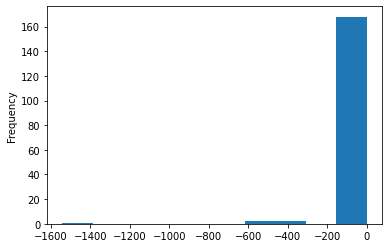

In [80]:
dmdts.dmdt_min.plot.hist()

### Selection criterior: dmdt_min - dmdt_error < threshold (e.g. -0.5 mag / day) and dt > 0.5 (we don't trust those)

In [81]:
# select objects that rise faster than this value in some band
threshold = -0.5 # mag / day
oids = dmdts.loc[(dmdts.dmdt_comp < threshold) & (dmdts.dt > 0.5)].index.unique().tolist()
print(len(oids))
print(oids)

9
['ZTF20acpbtar', 'ZTF22aaxfikm', 'ZTF23aasbvab', 'ZTF23aaskufq', 'ZTF23aaskufv', 'ZTF23aasmjxj', 'ZTF23aasmswj', 'ZTF23aasqriz', 'ZTF23aasrcyv']


<AxesSubplot:ylabel='Frequency'>

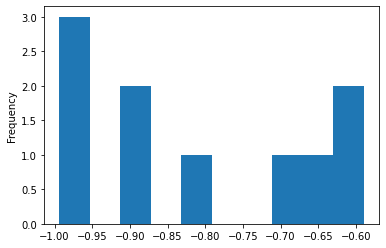

In [82]:
dmdts.loc[oids].dmdt_min.plot.hist()

# Show summary of all tables

In [83]:
sn.loc[oids]

,meanra,meandec,firstmjd,ndet,probability
oid,,,,,
ZTF20acpbtar,316.846534,21.501107,60144.452060,1,0.546639
ZTF22aaxfikm,330.714877,-10.036107,60142.419317,1,0.557522
ZTF23aasbvab,334.625788,29.244735,60141.324676,6,0.778128
ZTF23aaskufq,337.036564,-1.460651,60142.426910,1,0.841014
ZTF23aaskufv,337.072290,-1.497679,60142.426910,1,0.868275
ZTF23aasmjxj,302.802254,61.971947,60142.431123,1,0.537439
ZTF23aasmswj,344.738391,18.412577,60142.437512,1,0.713621
ZTF23aasqriz,273.588485,19.822751,60143.389294,1,0.802810
ZTF23aasrcyv,11.287685,-9.627295,60144.438599,1,0.797019


In [84]:
detections.loc[oids]

,candid,drb,fid,mjd,magpsf,sigmapsf,has_stamp,sgscore1,distpsnr1
oid,,,,,,,,,
ZTF20acpbtar,2390452065815015019,1.000000,1,60144.452060,18.872770,0.081523,True,0.981000,1.022396
ZTF22aaxfikm,2388419312115015029,0.994533,2,60142.419317,17.525408,0.163114,True,0.073083,0.110711
ZTF23aasbvab,2387324674815015026,0.999999,1,60141.324676,18.747585,0.093291,True,0.029390,2.534810
ZTF23aasbvab,2388360136115015025,0.999989,1,60142.360139,18.527340,0.086972,True,0.029390,2.534810
ZTF23aasbvab,2390372196115015021,0.999990,2,60144.372199,18.444302,0.069195,True,0.029390,2.534810
ZTF23aasbvab,2390372674815015020,0.999441,2,60144.372674,18.464226,0.085786,True,0.029390,2.534810
ZTF23aasbvab,2390451574815015025,0.999999,1,60144.451574,18.491262,0.081170,True,0.029390,2.534810
ZTF23aasbvab,2390453986115015031,0.999998,1,60144.453982,18.408058,0.059098,True,0.029390,2.534810
ZTF23aaskufq,2388426904515015070,0.999976,2,60142.426910,19.410524,0.160535,True,0.000000,0.362285


In [85]:
non_detections.loc[oids]

,mjd,diffmaglim,fid
oid,,,
ZTF20acpbtar,60115.413056,20.7084,1
ZTF20acpbtar,60118.414282,20.4042,1
ZTF20acpbtar,60120.422222,20.7709,1
ZTF20acpbtar,60122.419178,20.8369,1
ZTF20acpbtar,60125.399745,20.3634,1
...,...,...,...
ZTF23aasrcyv,60138.432523,19.9714,1
ZTF23aasrcyv,60141.466053,20.2492,1
ZTF23aasrcyv,60136.425046,19.7873,2


In [86]:
dmdts.loc[oids]

,dmdt_min,dmdt_error,dmdt_comp,dt,fid,Flag
ZTF20acpbtar,-0.599984,0.026088,-0.573896,3.124965,1,False
ZTF22aaxfikm,-0.686967,0.041021,-0.645945,3.976308,2,False
ZTF23aasbvab,-0.961419,0.049984,-0.911435,1.866424,1,False
ZTF23aasbvab,-0.873074,0.047517,-0.825557,1.963310,2,False
ZTF23aaskufq,-0.970128,0.156024,-0.814103,1.028912,2,False
ZTF23aaskufv,-0.795185,0.166765,-0.628419,1.028912,2,False
ZTF23aasmjxj,-0.589477,0.035988,-0.553488,4.064271,2,False
ZTF23aasmswj,-0.890174,0.033567,-0.856606,2.980208,1,False
ZTF23aasqriz,-0.993648,0.013896,-0.979752,3.119977,2,False
ZTF23aasrcyv,-0.655426,0.024657,-0.630768,2.972546,1,False


### Additional test: get galactic and ecliptic coordinates, also extinction in the direction of the object. If extinction too large, probably not a SN. If galactic or ecliptic latitude too small, probably variable star or asteroid, respectively

In [87]:
from astroquery.irsa_dust import IrsaDust
import astropy.coordinates as coord
import astropy.units as u

In [88]:
ecl_lat = {}
gal_lat = {}
gal_A_g = {}

for oid in oids:

    print(oid)
    ra = sn.loc[oid].meanra
    dec = sn.loc[oid].meandec
    coo = coord.SkyCoord(ra, dec, unit='deg', frame='fk5')    

    # ecliptic coordinates (input is hours, degrees)
    ecl_lat[oid] = np.rad2deg(ephem.Ecliptic(ephem.Equatorial('%s' % (ra / 15.), '%s' % dec, epoch=ephem.J2000)).lat)
    
    # galactic latitude
    gal_lat[oid] = np.rad2deg(ephem.Galactic(ephem.Equatorial('%s' % (ra / 15.), '%s' % dec, epoch=ephem.J2000)).lat)

    # Galactic extinction (use SFD = D.J. Schlegel, D.P. Finkbeiner, & M. Davis (1998, ApJ, 500, 525))
    table = IrsaDust.get_extinction_table(coo)
    gal_A_g[oid] = float(table[table["Filter_name"] == "SDSS g"]["A_SFD"])

ZTF20acpbtar
ZTF22aaxfikm
ZTF23aasbvab
ZTF23aaskufq
ZTF23aaskufv
ZTF23aasmjxj
ZTF23aasmswj
ZTF23aasqriz
ZTF23aasrcyv


In [89]:
sn_final = pd.concat([sn.loc[oids], pd.DataFrame.from_dict({'ecl_lat': ecl_lat, 'gal_lat': gal_lat, 'gal_A_g': gal_A_g})], axis=1, sort=False)
sn_final

,meanra,meandec,firstmjd,ndet,probability,ecl_lat,gal_lat,gal_A_g
ZTF20acpbtar,316.846534,21.501107,60144.452060,1,0.546639,36.114709,-17.203124,0.653
ZTF22aaxfikm,330.714877,-10.036107,60142.419317,1,0.557522,1.817111,-46.823658,0.156
ZTF23aasbvab,334.625788,29.244735,60141.324676,6,0.778128,36.652481,-22.780926,0.299
ZTF23aaskufq,337.036564,-1.460651,60142.426910,1,0.841014,7.570892,-47.139969,0.238
ZTF23aaskufv,337.072290,-1.497679,60142.426910,1,0.868275,7.523288,-47.191131,0.241
ZTF23aasmjxj,302.802254,61.971947,60142.431123,1,0.537439,75.237371,15.061854,0.704
ZTF23aasmswj,344.738391,18.412577,60142.437512,1,0.713621,22.900922,-36.921423,0.311
ZTF23aasqriz,273.588485,19.822751,60143.389294,1,0.802810,43.204343,16.828881,0.474
ZTF23aasrcyv,11.287685,-9.627295,60144.438599,1,0.797019,-13.308894,-72.436251,0.139


<AxesSubplot:ylabel='Frequency'>

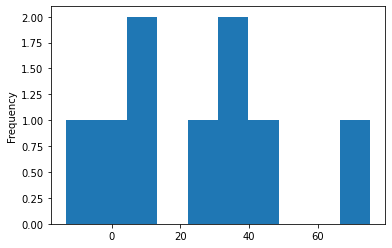

In [90]:
sn_final.ecl_lat.plot.hist()

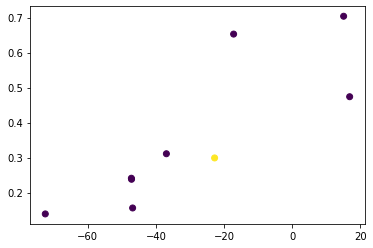

In [91]:
fig, ax = plt.subplots()
ax.scatter(sn_final.gal_lat, sn_final.gal_A_g, c=sn_final.ndet)

### remove everything with |ecliptic latitude| below 20 unless it has more than one detection, and with galactic or ecliptic latitude below |20| or A_g > 1

In [99]:
mask = ((sn_final.ndet > 1) | (sn_final.ecl_lat > 20)) & (sn_final.gal_lat.abs() > 20) & (sn_final.gal_A_g < 1)

In [101]:
sn_final.loc[mask]

,meanra,meandec,firstmjd,ndet,probability,ecl_lat,gal_lat,gal_A_g
ZTF23aasbvab,334.625788,29.244735,60141.324676,6,0.778128,36.652481,-22.780926,0.299
ZTF23aasmswj,344.738391,18.412577,60142.437512,1,0.713621,22.900922,-36.921423,0.311


# Plot stamps of final list

In [103]:
for oid in sn_final.loc[mask].index:
    display(HTML("<a href='http://alerce.online/object/%s'> %s <a>" % (oid, oid)))
    display(pd.DataFrame(sn_final.loc[oid]).transpose())
    client.plot_stamps(oid)
    sn.loc[oid]

,meanra,meandec,firstmjd,ndet,probability,ecl_lat,gal_lat,gal_A_g
ZTF23aasbvab,334.625788,29.244735,60141.324676,6.0,0.778128,36.652481,-22.780926,0.299


,meanra,meandec,firstmjd,ndet,probability,ecl_lat,gal_lat,gal_A_g
ZTF23aasmswj,344.738391,18.412577,60142.437512,1.0,0.713621,22.900922,-36.921423,0.311


# Plot distribution of dmdt

In [104]:
sn_final.head()

,meanra,meandec,firstmjd,ndet,probability,ecl_lat,gal_lat,gal_A_g
ZTF20acpbtar,316.846534,21.501107,60144.452060,1,0.546639,36.114709,-17.203124,0.653
ZTF22aaxfikm,330.714877,-10.036107,60142.419317,1,0.557522,1.817111,-46.823658,0.156
ZTF23aasbvab,334.625788,29.244735,60141.324676,6,0.778128,36.652481,-22.780926,0.299
ZTF23aaskufq,337.036564,-1.460651,60142.426910,1,0.841014,7.570892,-47.139969,0.238
ZTF23aaskufv,337.072290,-1.497679,60142.426910,1,0.868275,7.523288,-47.191131,0.241


# Plot distribution in the sky

Text(0, 0.5, 'N')

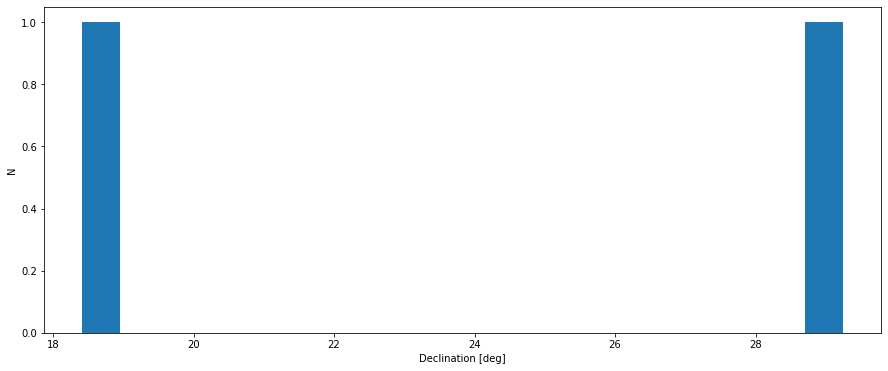

In [105]:
fig, ax = plt.subplots(figsize=(15, 6))
ax.hist(sn_final.loc[mask].meandec, bins=20);
ax.set_xlabel("Declination [deg]")
ax.set_ylabel("N")

Text(0, 0.5, 'N')

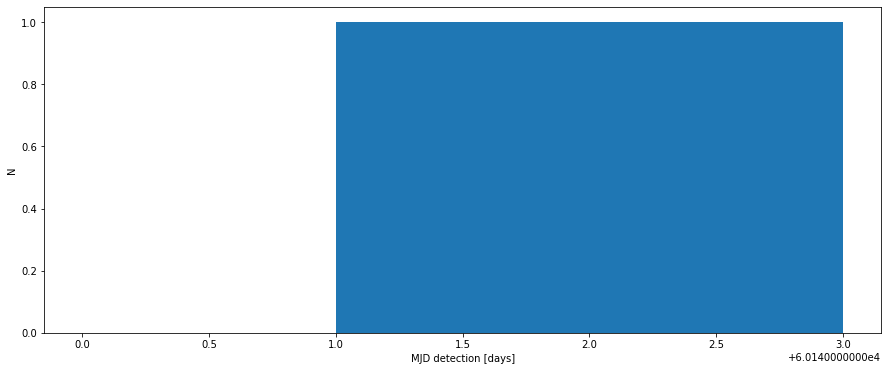

In [106]:
fig, ax = plt.subplots(figsize=(15, 6))
mjd_i = int(sn_final.loc[mask].firstmjd.min() - 1)
mjd_f = int(sn_final.loc[mask].firstmjd.max() + 1)
ax.hist(sn_final.loc[mask].firstmjd, bins=np.linspace(mjd_i, mjd_f, mjd_f - mjd_i + 1));
ax.set_xlabel("MJD detection [days]")
ax.set_ylabel("N")

# Spatial distribution

Text(0, 0.5, 'DEC')

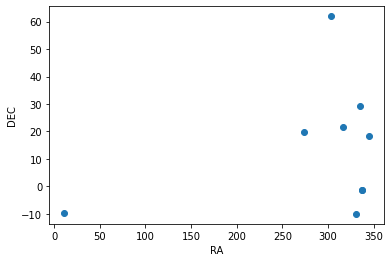

In [107]:
fig, ax = plt.subplots()
ax.scatter(sn_final.meanra,sn_final.meandec)
ax.set_xlabel("RA")
ax.set_ylabel("DEC")

# This is useful if there were lots of candidates to plot

In [108]:
import datashader as ds
import datashader.transfer_functions as tf
import bokeh.plotting as bp
from datashader.bokeh_ext import InteractiveImage

In [109]:
bp.output_notebook()
p = bp.figure(tools='pan,wheel_zoom,reset', x_range=(0,360), y_range=(-90,90), plot_width=800, plot_height=500)

def image_callback(x_range, y_range, w, h):
    cvs = ds.Canvas(plot_width=w, plot_height=h, x_range=x_range, y_range=y_range)
    agg = cvs.points(sn_final.loc[mask], 'meanra', 'meandec', ds.count())
    img = tf.shade(agg, cmap=viridis)
    return tf.spread(img)

InteractiveImage(p, image_callback)

Loading BokehJS ...

/home/fforster/anaconda3/lib/python3.8/site-packages/datashader/bokeh_ext.py:233: VisibleDeprecationWarning: InteractiveImage has been deprecated as of datashader 0.8.0. It is not supported in JupyterLab and Bokeh server environments. Please use the HoloViews datashader integration instead.
  warnings.warn('InteractiveImage has been deprecated as of datashader 0.8.0. '
/home/fforster/anaconda3/lib/python3.8/site-packages/datashader/transfer_functions/__init__.py:282: RuntimeWarning: invalid value encountered in true_divide
  scaled_data = (data - span[0])/(span[1] - span[0])
